# PROHI HT2024

## OCD Patient Dataset: Demographics & Clinical Data
Source of the data set: https://www.kaggle.com/datasets/ohinhaque/ocd-patient-dataset-demographics-and-clinical-data

`Features in the dataset:`

Numeric features
- Patient ID
- Age
- Duration of Symptoms
- Y-BOCS score (Obsession)
- Y-BOCS score (Compulsions)

Boolean features
- Gender
- Familiy History of OCD
- Depression Diagnosis
- Anxiety Diagnosis

Categorical Features (nominal)
- Ethnicity
- Marital Status
- Previous Diagnosis
- Obsession Type
- Compulsion Type
- Medications

Categorical Features (ordinal)
- Education Level

Date (will be dropped)
- OCD Diagnosis Date


### Basic EDA

#### 1. Loading and formatting

a) Load the dataset into a pandas DataFrame.

In [1]:
import pandas as pd
# Pandas provides built-in functions to load text files into DataFrames.
df = pd.read_csv("ocd_patient_dataset.csv")
df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,15/07/2016,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,28/04/2017,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,02/02/2018,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,25/08/2014,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,20/02/2022,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


In [2]:
import random

new_rows = []
for i in range(150):
    new_row = {
        'Patient ID': max(df['Patient ID']) + i + 1,
        'Age': random.randint(20, 70),
        'Gender': random.choice(['Male', 'Female']),
        'Ethnicity': random.choice(['Caucasian', 'Hispanic', 'African', 'Asian']),
        'Marital Status': random.choice(['Divorced', 'Married']),
        'Education Level': 'Graduate Degree',
        'OCD Diagnosis Date': 'N/A',
        'Duration of Symptoms (months)': random.randint(1, 240),
        'Previous Diagnoses': random.choice(['PTSD', 'GAD', 'Panic Disorder']),
        'Family History of OCD': 'Yes',
        'Obsession Type': random.choice(['Harm-related', 'Contamination', 'Symmetry', 'Hoarding', 'Religious']),
        'Compulsion Type': random.choice(['Checking', 'Washing', 'Ordering', 'Praying', 'Counting']),
        'Y-BOCS Score (Obsessions)': random.randint(0, 40),
        'Y-BOCS Score (Compulsions)': random.randint(0, 40),
        'Depression Diagnosis': 'Yes',
        'Anxiety Diagnosis': 'Yes',
        'Medications': 'None'
    }
    new_rows.append(new_row)

df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)


new_rows_depression_0 = []
for i in range(200):
    new_row = {
        'Patient ID': max(df['Patient ID']) + i + 51,
        'Age': random.randint(20, 70),
        'Gender': random.choice(['Male', 'Female']),
        'Ethnicity': random.choice(['Caucasian', 'Hispanic', 'African', 'Asian']),
        'Marital Status': random.choice(['Single', 'Married']),
        'Education Level': random.choice(['High School', 'College Degree', 'Some College']),
        'OCD Diagnosis Date': 'N/A',
        'Duration of Symptoms (months)': random.randint(1, 240),
        'Previous Diagnoses': random.choice(['None']),
        'Family History of OCD': 'No',
        'Obsession Type': random.choice(['Harm-related', 'Contamination', 'Symmetry', 'Hoarding', 'Religious']),
        'Compulsion Type': random.choice(['Checking', 'Washing', 'Ordering', 'Praying', 'Counting']),
        'Y-BOCS Score (Obsessions)': random.randint(0, 40),
        'Y-BOCS Score (Compulsions)': random.randint(0, 40),
        'Depression Diagnosis': 'No',
        'Anxiety Diagnosis': 'No',
        'Medications': random.choice(['SSRI', 'SNRI', 'Benzodiazepine', 'None'])
    }
    new_rows_depression_0.append(new_row)

df = pd.concat([df, pd.DataFrame(new_rows_depression_0)], ignore_index=True)


b) Check the total size of the dataset.

c) Check the variable types.

In [3]:
df.dtypes

Patient ID                        int64
Age                               int64
Gender                           object
Ethnicity                        object
Marital Status                   object
Education Level                  object
OCD Diagnosis Date               object
Duration of Symptoms (months)     int64
Previous Diagnoses               object
Family History of OCD            object
Obsession Type                   object
Compulsion Type                  object
Y-BOCS Score (Obsessions)         int64
Y-BOCS Score (Compulsions)        int64
Depression Diagnosis             object
Anxiety Diagnosis                object
Medications                      object
dtype: object

In [4]:
df.columns

Index(['Patient ID', 'Age', 'Gender', 'Ethnicity', 'Marital Status',
       'Education Level', 'OCD Diagnosis Date',
       'Duration of Symptoms (months)', 'Previous Diagnoses',
       'Family History of OCD', 'Obsession Type', 'Compulsion Type',
       'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)',
       'Depression Diagnosis', 'Anxiety Diagnosis', 'Medications'],
      dtype='object')

d) "None" entries are displayed as "NaN". Make sure the entries are displayed correctly by filling the fields with their original value "None".

In [5]:
df['Previous Diagnoses'].fillna('None', inplace=True)
df['Medications'].fillna('None', inplace=True)

d) Delete not needed columns

In [6]:
# Drop columns which aren't needed
df.drop(columns=["OCD Diagnosis Date"], inplace=True)

### 2. Processing pipeline

a) Impute missing values

-> In this case, the dataset does not contain missing values and therefore there is no need to impute any values.

In [7]:
df.isnull().sum()

Patient ID                       0
Age                              0
Gender                           0
Ethnicity                        0
Marital Status                   0
Education Level                  0
Duration of Symptoms (months)    0
Previous Diagnoses               0
Family History of OCD            0
Obsession Type                   0
Compulsion Type                  0
Y-BOCS Score (Obsessions)        0
Y-BOCS Score (Compulsions)       0
Depression Diagnosis             0
Anxiety Diagnosis                0
Medications                      0
dtype: int64

b) Encoding categorical variables as binary

In [8]:
# Datatype
df['Depression Diagnosis'] = df['Depression Diagnosis'].map({'Yes': 1, 'No': 0})
df['Family History of OCD'] = df['Family History of OCD'].map({'Yes': 1, 'No': 0})
df['Anxiety Diagnosis'] = df['Anxiety Diagnosis'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [9]:

conditions = (
    (df['Marital Status'] == 'Divorced') | 
    (df['Family History of OCD'] == 1) | 
    (df['Education Level'] == 'Graduate Degree') |
    (df['Previous Diagnoses'] == 'PTSD') |
    (df['Anxiety Diagnosis'] == 1) |
    (df['Previous Diagnoses'] == 'GAD') |
    (df['Previous Diagnoses'] == 'Panic Disorder')
)

# Filter the rows where any of these conditions are met
filtered_rows = df.loc[conditions & df['Depression Diagnosis'] == 0]
print("filtered: ",len(filtered_rows))

sample_size = int(len(filtered_rows) * 0.12)

# Randomly select 70% of the filtered rows
random_sample = filtered_rows.sample(n=sample_size, random_state=2)

# Update 'Depression Diagnosis' to 1 for the selected random sample
df.loc[random_sample.index, 'Depression Diagnosis'] = 1



# # Verify the changes
print(df[['Depression Diagnosis']].value_counts())


filtered:  966
Depression Diagnosis
1                       1035
0                        815
Name: count, dtype: int64


In [10]:
from sklearn.preprocessing import OneHotEncoder

Create df_p to put in the one-hot encoding dataset

In [11]:
df_p = df

c) One-hot encoding of categorical variables

In [12]:
# OneHotEncode
# Compulsion Type
compulsion_types = df['Compulsion Type'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_compulsion_types = ohe.fit_transform(df[['Compulsion Type']])
encoded_column_names_Compulsion = [f"Compulsion_Type_{compulsion_type}" for compulsion_type in compulsion_types]
encoded_df = pd.DataFrame(encoded_compulsion_types.toarray().astype(int), columns=encoded_column_names_Compulsion)
df_p = pd.concat([df_p, encoded_df], axis=1)
df_p.drop('Compulsion Type', axis=1, inplace=True)

# Medications
medications = df['Medications'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_medications = ohe.fit_transform(df[['Medications']])
encoded_column_names = [f"Medications_{medication}" for medication in medications]
encoded_df = pd.DataFrame(encoded_medications.toarray().astype(int), columns=encoded_column_names)
df_p = pd.concat([df_p, encoded_df], axis=1)
df_p.drop('Medications', axis=1, inplace=True)

# One-hot encoding for Ethnicity
ethnicities = df['Ethnicity'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_ethnicities = ohe.fit_transform(df[['Ethnicity']])
encoded_ethnicity_column_names = [f"Ethnicity_{ethnicity}" for ethnicity in ethnicities]
encoded_ethnicity_df = pd.DataFrame(encoded_ethnicities.toarray().astype(int), columns=encoded_ethnicity_column_names)
df_p = pd.concat([df_p, encoded_ethnicity_df], axis=1)
df_p.drop('Ethnicity', axis=1, inplace=True)

# One-hot encoding for Marital Status
marital_statuses = df['Marital Status'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_marital_statuses = ohe.fit_transform(df[['Marital Status']])
encoded_marital_status_column_names = [f"Marital Status_{status}" for status in marital_statuses]
encoded_marital_status_df = pd.DataFrame(encoded_marital_statuses.toarray().astype(int), columns=encoded_marital_status_column_names)
df_p = pd.concat([df_p, encoded_marital_status_df], axis=1)
df_p.drop('Marital Status', axis=1, inplace=True)

# One-hot encoding for Education Level
education_levels = df['Education Level'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_education_levels = ohe.fit_transform(df[['Education Level']])
encoded_education_level_column_names = [f"Education Level_{level}" for level in education_levels]
encoded_education_level_df = pd.DataFrame(encoded_education_levels.toarray().astype(int), columns=encoded_education_level_column_names)
df_p = pd.concat([df_p, encoded_education_level_df], axis=1)
df_p.drop('Education Level', axis=1, inplace=True)

# One-hot encoding for Previous Diagnoses
previous_diagnoses = df['Previous Diagnoses'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_previous_diagnoses = ohe.fit_transform(df[['Previous Diagnoses']])
encoded_previous_diagnosis_column_names = [f"Previous Diagnoses_{diagnosis}" for diagnosis in previous_diagnoses]
encoded_previous_diagnosis_df = pd.DataFrame(encoded_previous_diagnoses.toarray().astype(int), columns=encoded_previous_diagnosis_column_names)
df_p = pd.concat([df_p, encoded_previous_diagnosis_df], axis=1)
df_p.drop('Previous Diagnoses', axis=1, inplace=True)

# One-hot encoding for Obsession Type
obsession_types = df['Obsession Type'].unique()
ohe = OneHotEncoder(handle_unknown='ignore')
encoded_obsession_types = ohe.fit_transform(df[['Obsession Type']])
encoded_obsession_type_column_names = [f"Obsession Type_{type}" for type in obsession_types]
encoded_obsession_type_df = pd.DataFrame(encoded_obsession_types.toarray().astype(int), columns=encoded_obsession_type_column_names)
df_p = pd.concat([df_p, encoded_obsession_type_df], axis=1)
df_p.drop('Obsession Type', axis=1, inplace=True)

print(df_p.dtypes)

Patient ID                           int64
Age                                  int64
Gender                               int64
Duration of Symptoms (months)        int64
Family History of OCD                int64
Y-BOCS Score (Obsessions)            int64
Y-BOCS Score (Compulsions)           int64
Depression Diagnosis                 int64
Anxiety Diagnosis                    int64
Compulsion_Type_Checking             int64
Compulsion_Type_Washing              int64
Compulsion_Type_Ordering             int64
Compulsion_Type_Praying              int64
Compulsion_Type_Counting             int64
Medications_SNRI                     int64
Medications_SSRI                     int64
Medications_Benzodiazepine           int64
Medications_None                     int64
Ethnicity_African                    int64
Ethnicity_Hispanic                   int64
Ethnicity_Asian                      int64
Ethnicity_Caucasian                  int64
Marital Status_Single                int64
Marital Sta

In [13]:
df_p.columns

Index(['Patient ID', 'Age', 'Gender', 'Duration of Symptoms (months)',
       'Family History of OCD', 'Y-BOCS Score (Obsessions)',
       'Y-BOCS Score (Compulsions)', 'Depression Diagnosis',
       'Anxiety Diagnosis', 'Compulsion_Type_Checking',
       'Compulsion_Type_Washing', 'Compulsion_Type_Ordering',
       'Compulsion_Type_Praying', 'Compulsion_Type_Counting',
       'Medications_SNRI', 'Medications_SSRI', 'Medications_Benzodiazepine',
       'Medications_None', 'Ethnicity_African', 'Ethnicity_Hispanic',
       'Ethnicity_Asian', 'Ethnicity_Caucasian', 'Marital Status_Single',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Education Level_Some College', 'Education Level_College Degree',
       'Education Level_High School', 'Education Level_Graduate Degree',
       'Previous Diagnoses_MDD', 'Previous Diagnoses_None',
       'Previous Diagnoses_PTSD', 'Previous Diagnoses_GAD',
       'Previous Diagnoses_Panic Disorder', 'Obsession Type_Harm-related',
     

d) Create a file with processed data

In [14]:
df_p.to_csv("./depression_dataset_processed.csv", index=False)

---

### Tab 1: Descriptive Analytics

In [15]:
# Change name of dataframe for analytical questions
dfa = df_p

`Question 1:` What is the total amount of patients in the dataset?

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Calculate the total number of patients
total_patients = dfa.shape[0]
print(f"Total number of patients: {total_patients}")

Total number of patients: 1850


`Question 2:` How many have a depression diagnosis? (shown as a number and in percentage with a pie chart)

In [18]:
# Count the number of patients with a depression diagnosis
depression_count = dfa[dfa['Depression Diagnosis'] == True].shape[0]
print(f"Number of patients with a depression diagnosis: {depression_count}")

Number of patients with a depression diagnosis: 1035


Percentage of patients with a depression diagnosis: 55.95%


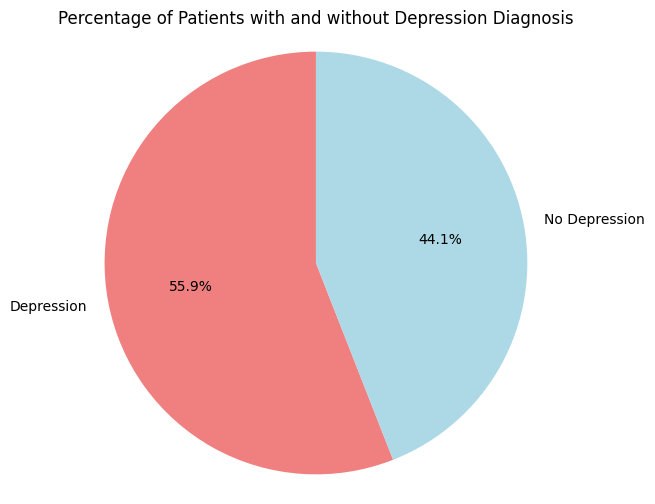

In [19]:
# Total number of patients
total_patients = dfa.shape[0]

# Number of patients with a depression diagnosis
depression_count = dfa[dfa['Depression Diagnosis'] == True].shape[0]

# Calculate the percentage
depression_percentage = (depression_count / total_patients) * 100

print(f"Percentage of patients with a depression diagnosis: {depression_percentage:.2f}%")

# Values for the pie chart
values = [depression_count, total_patients - depression_count]
labels = ['Depression', 'No Depression']

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Percentage of Patients with and without Depression Diagnosis')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
plt.show()

`Question 3:` Which age group of OCD patients has the highest rate of depression diagnosis? (-> most at risk of developing depression)

/tmp/ipykernel_99608/300172630.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_depression = dfa.groupby('age_group')['Depression Diagnosis'].mean() * 100
/tmp/ipykernel_99608/300172630.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_depression.index, y=age_depression.values, palette='coolwarm')


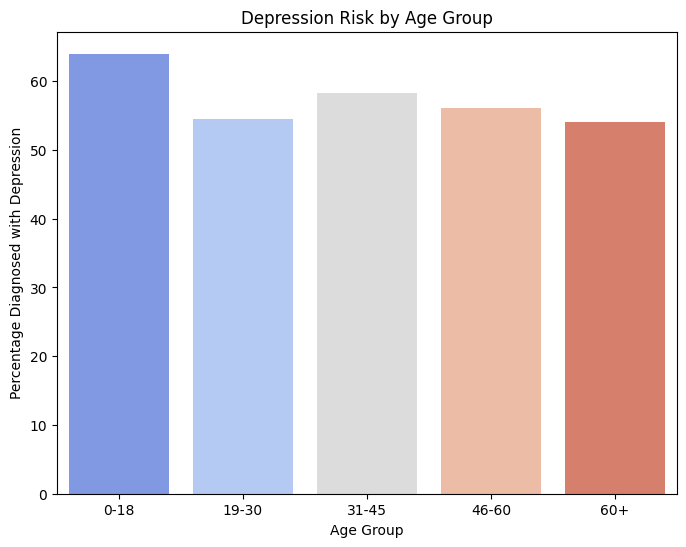

In [20]:
# Create age bins to group patients by age
age_bins = [0, 18, 30, 45, 60, 100]
age_labels = ['0-18', '19-30', '31-45', '46-60', '60+']
dfa['age_group'] = pd.cut(dfa['Age'], bins=age_bins, labels=age_labels)

# Group by age group and calculate the percentage of patients with depression
age_depression = dfa.groupby('age_group')['Depression Diagnosis'].mean() * 100

# Plot bar chart
plt.figure(figsize=(8,6))
sns.barplot(x=age_depression.index, y=age_depression.values, palette='coolwarm')
plt.title('Depression Risk by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage Diagnosed with Depression')
plt.show()

The age group 0-18 exhibits the highest rate of depression diagnoses. However, it’s important to note that the dataset only includes patients aged 18 and older. This age group represents a relatively small portion of the total population. Consequently, this finding suggests that over 50% of individuals at the age of 18 have received a depression diagnosis.

`Question 4:` What is the prevalence of depression diagnosis among men and women? 

Percentage of men with a depression diagnosis: 56.49%
Percentage of women with a depression diagnosis: 55.41%


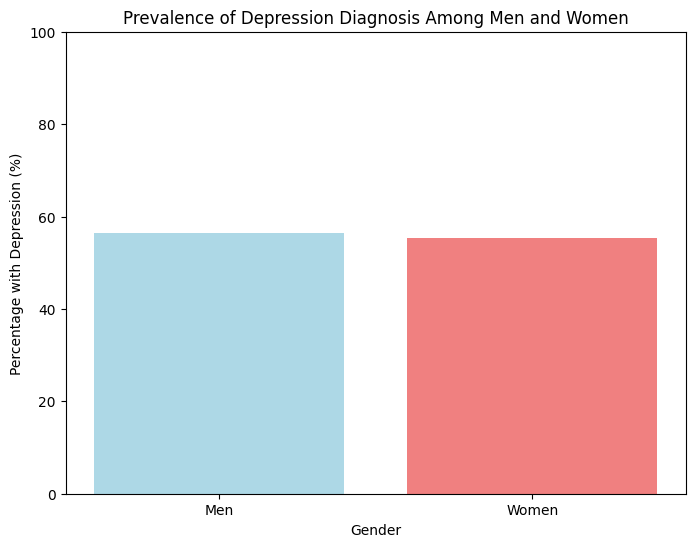

In [21]:
# 'Gender' is boolean: True = Male, False = Female

# Total number of male and female patients
total_men = dfa[dfa['Gender'] == 0].shape[0]
total_women = dfa[dfa['Gender'] == 1].shape[0]

# Number of men and women with a depression diagnosis
men_with_depression = dfa[(dfa['Gender'] == 0) & (df['Depression Diagnosis'] == True)].shape[0]
women_with_depression = dfa[(dfa['Gender'] == 1) & (df['Depression Diagnosis'] == True)].shape[0]

# Calculate the percentage of men and women with a depression diagnosis
men_depression_percentage = (men_with_depression / total_men) * 100 if total_men != 0 else 0
women_depression_percentage = (women_with_depression / total_women) * 100 if total_women != 0 else 0

# Print the results
print(f"Percentage of men with a depression diagnosis: {men_depression_percentage:.2f}%")
print(f"Percentage of women with a depression diagnosis: {women_depression_percentage:.2f}%")

# Bar chart for visualizing the prevalence of depression in men and women
gender_labels = ['Men', 'Women']
depression_percentages = [men_depression_percentage, women_depression_percentage]

plt.figure(figsize=(8, 6))
plt.bar(gender_labels, depression_percentages, color=['lightblue', 'lightcoral'])
plt.xlabel('Gender')
plt.ylabel('Percentage with Depression (%)')
plt.title('Prevalence of Depression Diagnosis Among Men and Women')
plt.ylim(0, 100)  # Set y-axis limits to 0-100%
plt.show()

The prevalence of depression diagnoses among men and women is nearly equal, with men exhibiting a slightly higher percentage at 52.06%.

`Question 5:` What medications are most prescribed to OCD patients with depression?

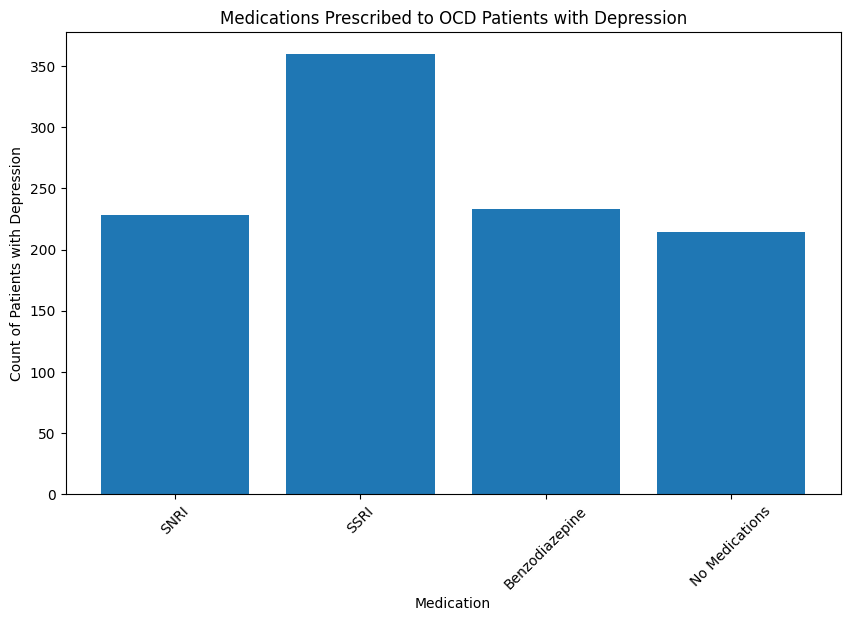

In [22]:
# Filter the data to only include OCD patients with depression
depressed_patients = dfa[dfa['Depression Diagnosis'] == 1]

# Calculate the count of patients prescribed each medication
medication_counts = depressed_patients[['Medications_SNRI', 'Medications_SSRI', 'Medications_Benzodiazepine', 'Medications_None']].sum()

# Graphic
plt.figure(figsize=(10, 6))
plt.bar(range(len(medication_counts)), medication_counts)
plt.xticks(range(len(medication_counts)), ['SNRI', 'SSRI', 'Benzodiazepine', 'No Medications'], rotation=45)
plt.xlabel('Medication')
plt.ylabel('Count of Patients with Depression')
plt.title('Medications Prescribed to OCD Patients with Depression')
plt.show()

In this dataset, SNRI is the most commonly prescribed medication for patients with a depression diagnosis.

---

### Tab 2: Diagnostic Analytics

In [23]:
# Rename dataframe for diagnostic questions
dfd = df_p

`Question 1:` Is there a significant correlation between the severity of OCD (Y-BOCS scores) and the likelihood of depression?

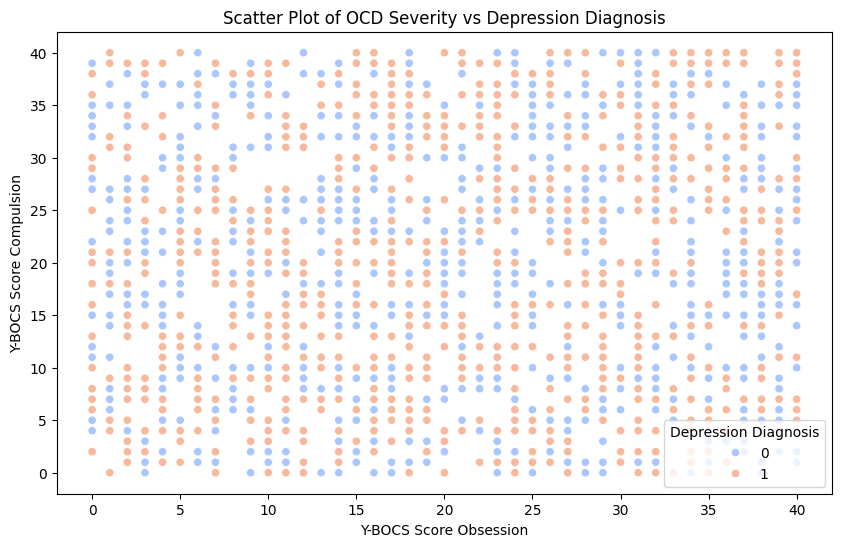

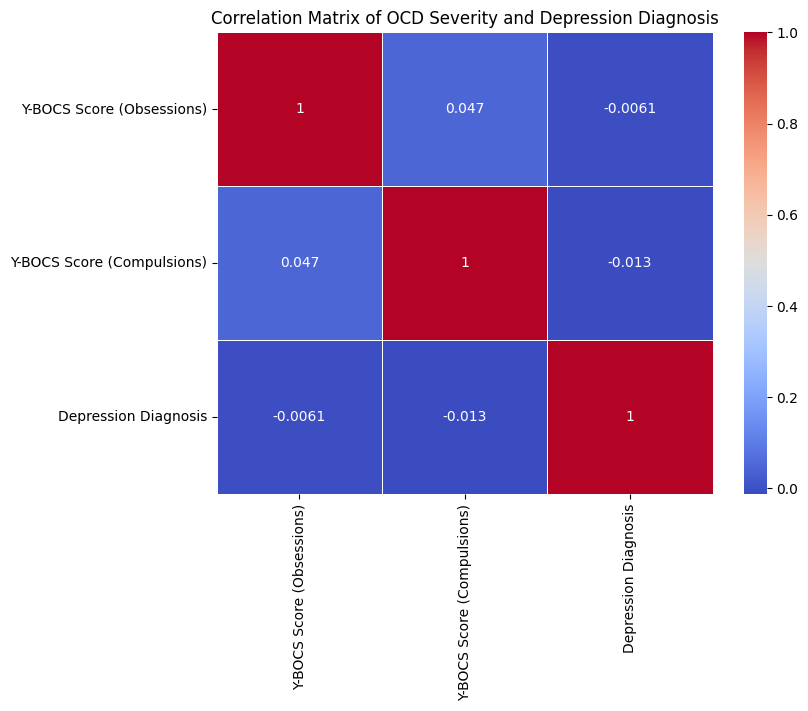

In [24]:
# Scatter plot for Y-BOCS scores (obsession and compulsion) vs depression diagnosis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Y-BOCS Score (Obsessions)', y='Y-BOCS Score (Compulsions)', hue='Depression Diagnosis', data=df_p, palette='coolwarm')
plt.title("Scatter Plot of OCD Severity vs Depression Diagnosis")
plt.xlabel("Y-BOCS Score Obsession")
plt.ylabel("Y-BOCS Score Compulsion")
plt.show()

# Correlation matrix for numerical variables
numerical_cols = ['Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)', 'Depression Diagnosis']
corr_matrix = df_p[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of OCD Severity and Depression Diagnosis")
plt.show()

There is no significant correlation between the severity of OCD, as measured by Y-BOCS scores, and the likelihood of depression. The correlation coefficients are very low, indicating a lack of correlation.

`Question 2:` Which types of compulsions are most associated with depression?

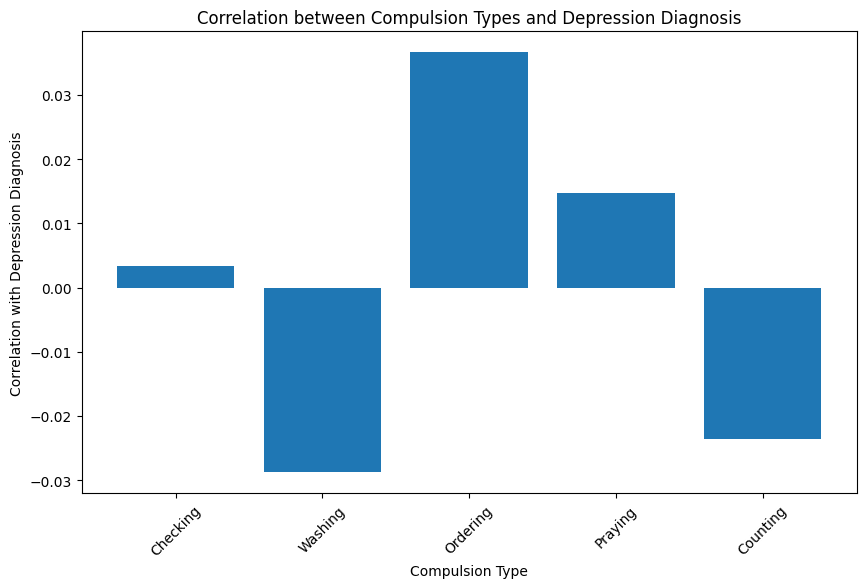

In [25]:
# Calculate the correlation between each compulsion type and Depression Diagnosis
correlations = dfd[['Compulsion_Type_Checking', 'Compulsion_Type_Washing', 'Compulsion_Type_Ordering',
                   'Compulsion_Type_Praying', 'Compulsion_Type_Counting', 'Depression Diagnosis']].corr()['Depression Diagnosis'][:-1]

# Graphic
plt.figure(figsize=(10, 6))
plt.bar(range(len(correlations)), correlations)
plt.xticks(range(len(correlations)), ['Checking', 'Washing', 'Ordering', 'Praying', 'Counting'], rotation=45)
plt.xlabel('Compulsion Type')
plt.ylabel('Correlation with Depression Diagnosis')
plt.title('Correlation between Compulsion Types and Depression Diagnosis')
plt.show()

Ordering (positive correlation coefficient) and counting (negative correlation coefficient) are the two types of compulsions most closely associated with depression. However, the correlation values are quite low, indicating that there is not a strong relationship between these compulsions and depression.

`Question 3:` Is there a relationship between a patient’s demographic factors (age,
gender, ethnicity) and the likelihood of depression in OCD patients? 

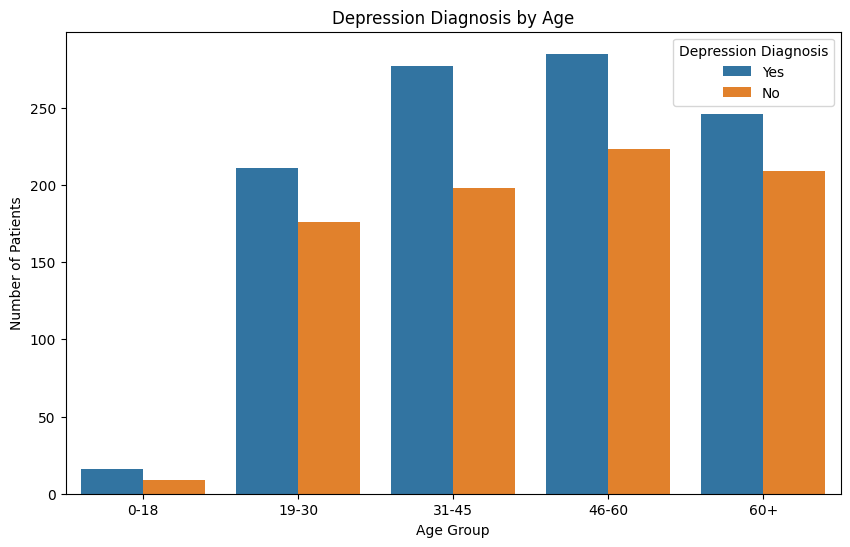

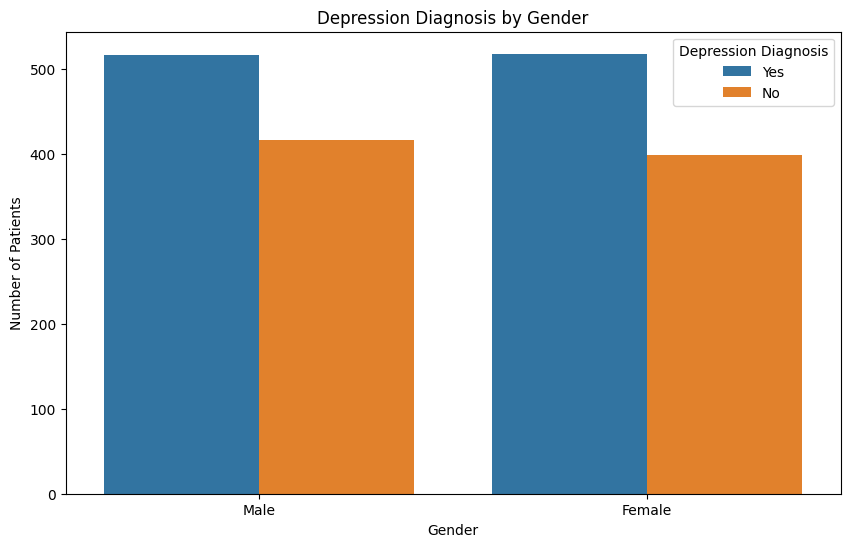

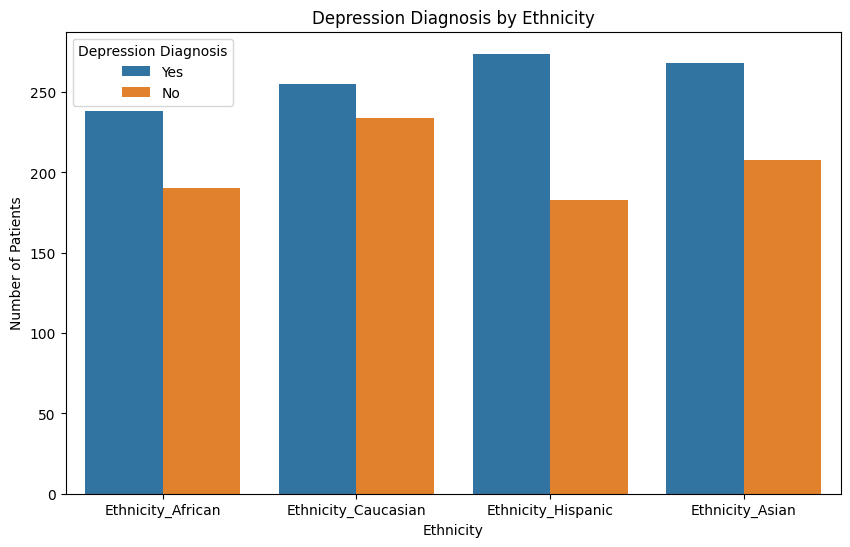

In [26]:
# Create a temporary DataFrame
df_temp = df_p.copy()

# Replace categorical values
df_temp['Gender'] = df['Gender'].replace({1: 'Male', 0: 'Female'})
df_temp['Depression Diagnosis'] = df['Depression Diagnosis'].replace({1: 'Yes', 0: 'No'})

# Create a new column Ethnicity
df_temp['Ethnicity'] = df_temp[['Ethnicity_African', 'Ethnicity_Hispanic', 'Ethnicity_Asian', 'Ethnicity_Caucasian']].idxmax(axis=1)

# Plot the bar chart for Age
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='Depression Diagnosis', data=df_temp)
plt.title('Depression Diagnosis by Age')
plt.ylabel('Number of Patients')
plt.xlabel('Age Group')
plt.show()

# Plot the bar chart for Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Depression Diagnosis', data=df_temp)
plt.title('Depression Diagnosis by Gender')
plt.ylabel('Number of Patients')
plt.xlabel('Gender')
plt.show()

# Plot the bar chart for Ethnicity
plt.figure(figsize=(10, 6))
sns.countplot(x='Ethnicity', hue='Depression Diagnosis', data=df_temp)
plt.title('Depression Diagnosis by Ethnicity')
plt.ylabel('Number of Patients')
plt.xlabel('Ethnicity')
plt.show()

Based on the results, it appears that individuals with the following demographic factors - ages 46-60, female, and Hispanic - may be more likely to receive a depression diagnosis. However, this conclusion would need to be verified using additional methods.

`Question 4:` Does a patient’s education level influence the likelihood of being diagnosed with depression?

In [27]:
from scipy.stats import chi2_contingency

# Create a contingency table for Education Level and Depression Diagnosis
contingency_table = pd.crosstab(df['Education Level'], df['Depression Diagnosis'])

# Perform Chi-Squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant association between Education Level and Depression Diagnosis (p < 0.05).")
else:
    print("There is no statistically significant association between Education Level and Depression Diagnosis (p >= 0.05).")

Chi-Squared Statistic: 49.74869609294724
P-value: 9.036898545114607e-11
There is a statistically significant association between Education Level and Depression Diagnosis (p < 0.05).


---

### Tab 3: Predictive Analytics

Input features:
- `age`
- `gender`
- `ethnicity`
- `martial status`
- `education level`
- `duration of symptoms`
- `previous diagnosis`
- `family history of OCD`
- `obsession type`
- `compulsion type`
- `Y-BOCS score obsession`
- `Y-BOCS score compulsion`
- `anxiety diagnosis`
- `medications`

Binary target class
- `Depression Diagnosis`

In [28]:
import numpy as np
# Set the seed of the pseudo randomization to guarantee that results are reproducible between executions
RANDOM_SEED = 2023
np.random.seed(RANDOM_SEED)

In [29]:
# Drop columns which are not needed, only keep input features and the target variable
df_p.drop(columns=["Patient ID"], inplace=True)
df_p

,Age,Gender,Duration of Symptoms (months),Family History of OCD,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Compulsion_Type_Checking,Compulsion_Type_Washing,...,Previous Diagnoses_None,Previous Diagnoses_PTSD,Previous Diagnoses_GAD,Previous Diagnoses_Panic Disorder,Obsession Type_Harm-related,Obsession Type_Contamination,Obsession Type_Symmetry,Obsession Type_Hoarding,Obsession Type_Religious,age_group
0,32,1,203,0,17,10,1,1,1,0,...,1,0,0,0,0,1,0,0,0,31-45
1,69,0,180,1,21,25,1,1,0,0,...,0,1,0,0,0,1,0,0,0,60+
2,57,0,173,0,3,4,0,0,1,0,...,1,0,0,0,1,0,0,0,0,46-60
3,27,1,126,1,14,28,1,1,0,0,...,0,0,1,0,0,0,0,0,1,19-30
4,56,1,168,1,39,18,0,0,0,0,...,0,0,1,0,0,0,1,0,0,46-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,60,1,186,0,9,21,0,0,0,0,...,0,1,0,0,0,0,0,1,0,46-60
1846,23,0,63,0,14,18,0,0,0,1,...,0,1,0,0,0,0,0,0,1,19-30
1847,38,0,145,0,32,33,0,0,0,1,...,0,1,0,0,0,0,1,0,0,31-45
1848,54,0,181,0,21,20,0,0,0,0,...,0,1,0,0,0,0,0,1,0,46-60


#### Prediction Model

In [30]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_p.drop(['Depression Diagnosis','age_group','Ethnicity_Hispanic','Ethnicity_African','Ethnicity_Caucasian', 'Ethnicity_Asian'], axis=1)  # Features (all columns except 'Depression Diagnosis')

y = df_p['Depression Diagnosis']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

#model to be used for prediction
models = {
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "RandomForestClassifier1": RandomForestClassifier(random_state=42, max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split = 2, n_estimators = 100),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "LogisticRegression1": LogisticRegression(solver='liblinear', C=0.1, penalty='l1', random_state=42),
    "SupportVector Machine": SVC(random_state=42),
    "SupportVector Machine1": SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42),
    "K-NearestNeighbors": KNeighborsClassifier(),
    "K-NearestNeighbors1": KNeighborsClassifier(n_neighbors=5, weights='distance', p=2),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "DecisionTree1": DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=4, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "GradientBoosting1": GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "AdaBoost1": AdaBoostClassifier(n_estimators=100, learning_rate=0.5, algorithm='SAMME', random_state=42),
    "NaiveBayes": GaussianNB(),
}

best_model = None
best_model_name = ""
best_accuracy = 0.0

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\n--- {model_name} ---")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = model_name

    if model_name == "RandomForestClassifier1":
        model_rf= model
        print ("model name: ", model)
    print(f"Model Accuracy: {accuracy * 100:.2f}%")
    
    # Print a detailed classification report
print(classification_report(y_test, y_pred, zero_division=1))



--- RandomForestClassifier ---
Model Accuracy: 57.30%
              precision    recall  f1-score   support

           0       0.51      0.42      0.46       161
           1       0.61      0.69      0.65       209

    accuracy                           0.57       370
   macro avg       0.56      0.55      0.55       370
weighted avg       0.57      0.57      0.57       370



#### Export trained model

In [32]:
import pickle
import os
# Save in the `assets` folder so that it is accessible from the web dashboard
file_path = f'./assets/best_model.pickle'

if not os.path.exists(file_path):
    with open(file_path, "wb") as writeFile:
        pickle.dump(best_model, writeFile)

In [33]:
pd.options.display.max_columns = None
display(df_p)

,Age,Gender,Duration of Symptoms (months),Family History of OCD,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Compulsion_Type_Checking,Compulsion_Type_Washing,Compulsion_Type_Ordering,Compulsion_Type_Praying,Compulsion_Type_Counting,Medications_SNRI,Medications_SSRI,Medications_Benzodiazepine,Medications_None,Ethnicity_African,Ethnicity_Hispanic,Ethnicity_Asian,Ethnicity_Caucasian,Marital Status_Single,Marital Status_Divorced,Marital Status_Married,Education Level_Some College,Education Level_College Degree,Education Level_High School,Education Level_Graduate Degree,Previous Diagnoses_MDD,Previous Diagnoses_None,Previous Diagnoses_PTSD,Previous Diagnoses_GAD,Previous Diagnoses_Panic Disorder,Obsession Type_Harm-related,Obsession Type_Contamination,Obsession Type_Symmetry,Obsession Type_Hoarding,Obsession Type_Religious,age_group
0,32,1,203,0,17,10,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,31-45
1,69,0,180,1,21,25,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,60+
2,57,0,173,0,3,4,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,46-60
3,27,1,126,1,14,28,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,19-30
4,56,1,168,1,39,18,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,46-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,60,1,186,0,9,21,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,46-60
1846,23,0,63,0,14,18,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,19-30
1847,38,0,145,0,32,33,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,31-45
1848,54,0,181,0,21,20,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,46-60
